In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from matplotlib.image import imread
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
my_data_dir = r"D:\My_Projects\Brain tumors 256x256\Data"
#res = os.walk(path)
#list(res)

In [3]:
# using Loop to extract the class from the folders 
classes = [class_name for class_name in os.listdir(my_data_dir)]
classes

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

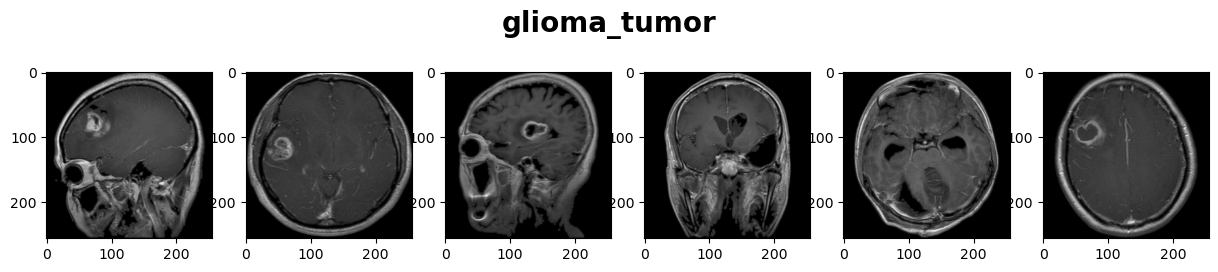

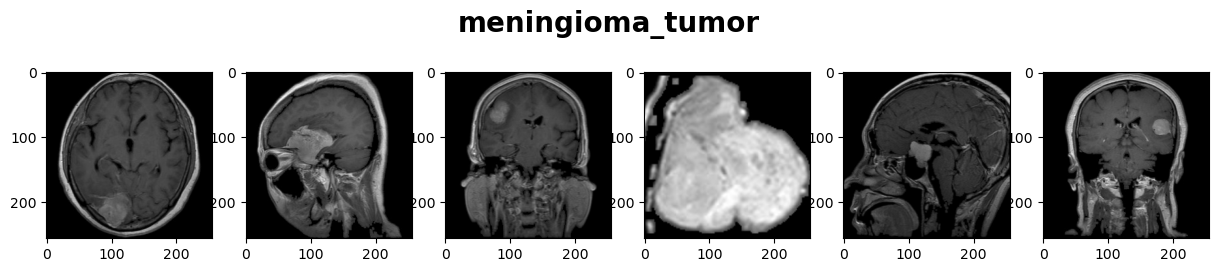

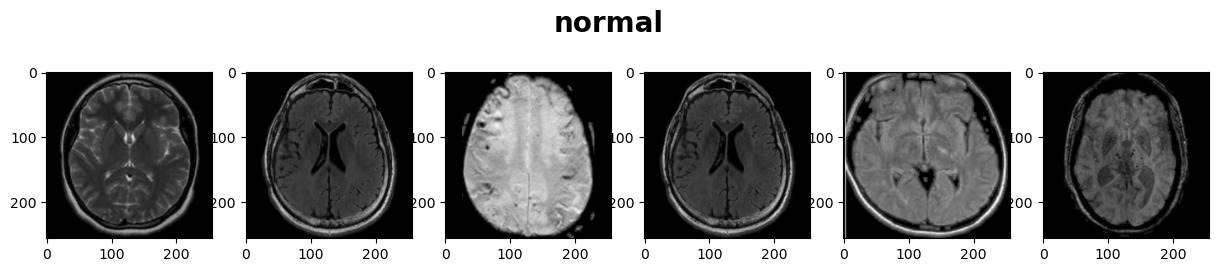

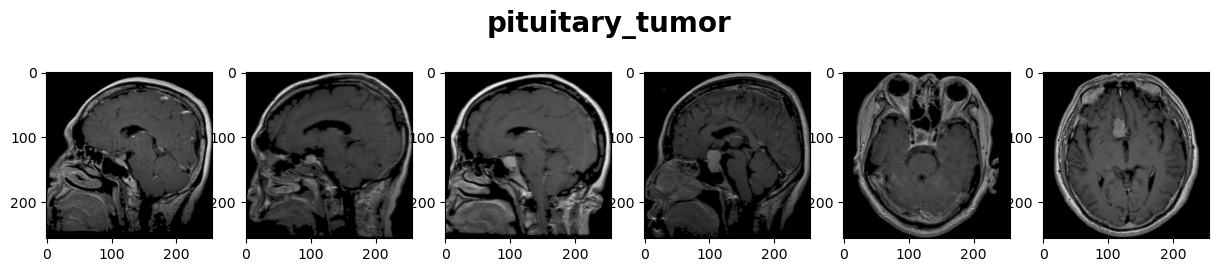

In [4]:
# os.listdir(path) function to get a list of names (files and directories) in the specified directory.

# os.path.join() combines the components into a single path.

for class_name in classes:
    # plot with 1 row and 6 columns
    fig, ax = plt.subplots(1, 6, figsize=(15,3))
    
    # joining my_data_dir and each class_name
    class_path = os.path.join(my_data_dir, class_name)
    
    # Getting the list of all image names in each class(folder)
    files = os.listdir(class_path)
    
    # choosing 6 random image from each class to show in plot
    random_images = random.choices(files, k=6)#files
    
    # Using a loop to iterate in each random images
    for i in range(6):
        plt.suptitle(class_name, fontsize=20, fontweight='bold')
        
        # img is path of image by joining class_path and image file name
        img = os.path.join(class_path, random_images[i])
        
        #loading the images in img using keras.utils.load_img()
        img = keras.utils.load_img(img)
        
        # ploting the image 
        ax[i].imshow(img)
        
        #ax[i].axis('off')
        
        # making the plots to become nearer to each other
        plt.tight_layout
        
        

In continue, create a barplot(horizon barplot) that each plot represent number of images in each classes.

Start with create a empty list to store count of each classes with loop over classes(folders) and count number of files(images) in them. At last plot them with seaborn.barplot 

In [5]:
classes

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

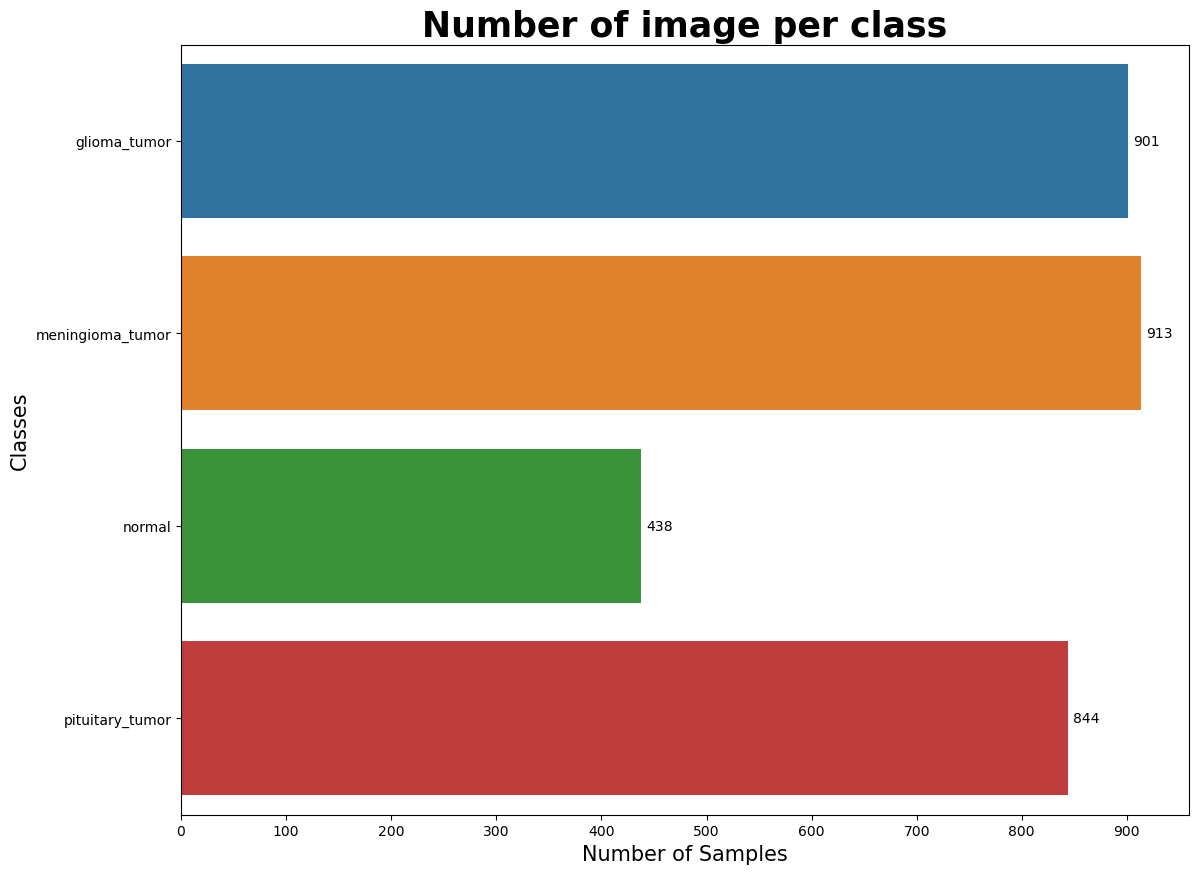

In [6]:
counts = []
# Loop over the classses to iterate below code for each class
for class_name in classes :
    class_path = os.path.join(my_data_dir, class_name)
    
    # adding number of files in each class to count list
    counts.append(len(os.listdir(class_path)))
    
# defining the plot size 
plt.figure(figsize=(13,10))
    
# Using a seaborn to plot a barplot for each class
ax = sns.barplot(y=classes, x=counts)
    
# ste X-axis  range and ticks
ax.set_xticks(range(0, 950, 100))
    
# Making changes to each bar with count
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width +5, p.get_y() + p.get_height()/2.,
            '{}'.format(counts[i]),
            va = "center", fontsize=10)
# Plot tittle 
plt.title('Number of image per class', fontsize=25, fontweight='bold')
 # Y-axis label
plt.ylabel('Classes',fontsize=15)
# X -axis label
plt.xlabel('Number of Samples',fontsize=15)
    
plt.show()

In [7]:
#define functions for loading data, applying different normalization techniques, and splitting the data.
def load_data(data_dir):
    data = []
    labels = []
    classes = os.listdir(data_dir)
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = img_to_array(load_img(img_path, target_size=(224, 224)))
            data.append(img)
            labels.append(class_name)
    return np.array(data), np.array(labels)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def split_data(data, labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
    return X_train, X_test, y_train, y_test, label_encoder


In [9]:
# Load data
data, labels = load_data(my_data_dir)

# Apply Min-Max normalization
def min_max_normalization(data):
    return data / 255.0

data_min_max = min_max_normalization(data)

X_train_mm, X_test_mm, y_train_mm, y_test_mm, _ = split_data(data_min_max, labels)


# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator_mm = train_datagen.flow(X_train_mm, y_train_mm, batch_size=32)
test_generator_mm = test_datagen.flow(X_test_mm, y_test_mm, batch_size=32)

In [10]:
train_generator_mm[0][0].shape

(32, 224, 224, 3)

In [11]:
#callbacks=[early_stop]

In [17]:
#  Build CNN Model 
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.4))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.4))
          
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Last layer
model.add(Dense(4))
model.add(Activation('softmax'))
    


In [ ]:
learning_rate = 0.001
          
    

#early_stop=EarlyStopping(monitor='val_loss',patience=2)

#compile model 
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# fit model 
history = model.fit(train_generator_mm,epochs=42,
                  validation_data=test_generator_mm,                     # callbacks =[early_stop]
                  )

Epoch 1/42
78/78 [==============================] - 49s 620ms/step - loss: 1.3660 - accuracy: 0.2981 - val_loss: 1.3354 - val_accuracy: 0.3048
Epoch 2/42
78/78 [==============================] - 50s 640ms/step - loss: 1.2884 - accuracy: 0.3764 - val_loss: 1.4313 - val_accuracy: 0.3000
Epoch 3/42
78/78 [==============================] - 48s 620ms/step - loss: 1.2462 - accuracy: 0.4152 - val_loss: 1.4059 - val_accuracy: 0.3016
Epoch 4/42
78/78 [==============================] - 48s 618ms/step - loss: 1.2092 - accuracy: 0.4321 - val_loss: 1.3471 - val_accuracy: 0.3871
Epoch 5/42
78/78 [==============================] - 49s 627ms/step - loss: 1.1698 - accuracy: 0.4604 - val_loss: 1.5367 - val_accuracy: 0.3129
Epoch 6/42
78/78 [==============================] - 49s 631ms/step - loss: 1.1207 - accuracy: 0.5028 - val_loss: 1.4135 - val_accuracy: 0.4694
Epoch 7/42
78/78 [==============================] - 49s 626ms/step - loss: 1.0440 - accuracy: 0.5400 - val_loss: 1.4459 - val_accuracy: 0.4774

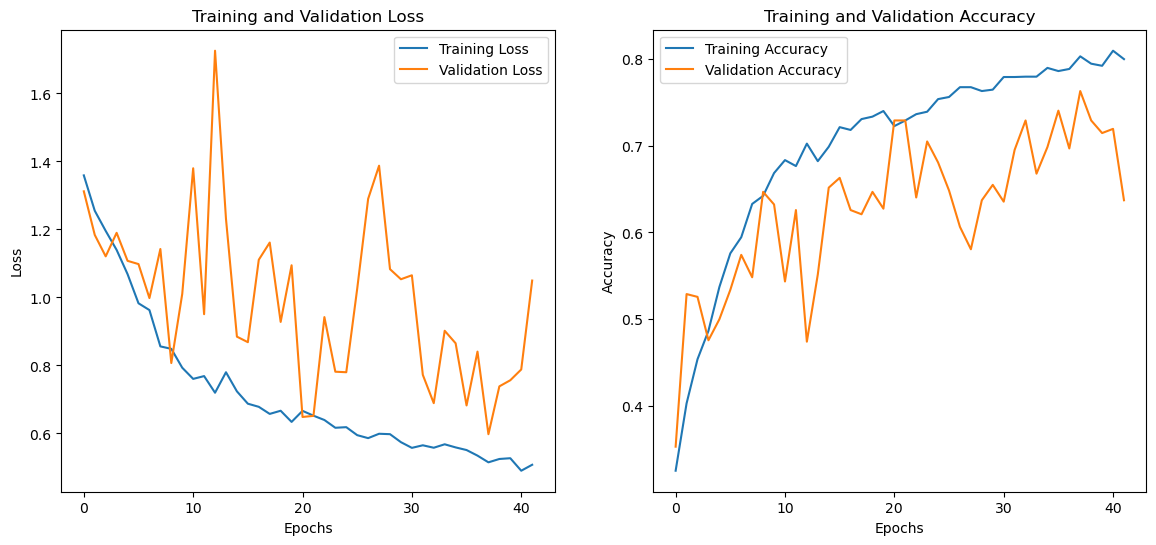

In [16]:
# Plotting training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 8)     224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 8)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 16)   0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, None, None, 16)    0         
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 32)    4

In [16]:
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.345316,0.311389,1.282386,0.422581
1,1.204155,0.436187,1.181092,0.441935
2,1.153214,0.500000,1.187615,0.401613
3,1.088480,0.527868,1.025428,0.548387
4,1.046588,0.554927,0.969281,0.580645


In [17]:
pred_prob = model.predict_generator(test_generator_mm)

In [18]:
pred_prob

array([[8.71604919e-01, 1.09447494e-01, 4.20937027e-07, 1.89472474e-02],
       [9.99765694e-01, 1.38231962e-06, 9.67924607e-14, 2.32960010e-04],
       [2.81257510e-01, 6.94077969e-01, 3.57529814e-07, 2.46641841e-02],
       ...,
       [7.17413127e-02, 9.28149343e-01, 1.00502162e-04, 8.81506639e-06],
       [3.08557190e-02, 9.68089998e-01, 5.94669274e-08, 1.05427520e-03],
       [4.37155575e-01, 3.51410776e-01, 1.55448916e-07, 2.11433485e-01]],
      dtype=float32)